# EDA - Exploratory Data Analysis
---

Import libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import plotly.express as px

---

## Import cleaned data parquet file

Import the cleaned data that was the outut of the 1st notebook

View the dataframe as a refresher of what we are dealing with

In [2]:
df = pd.read_parquet("../data/mental_health_social_media_dataset_cleaned.parquet")

df.head()

,date,year,month,month_name,week_number,day_of_week,age,age_group,gender,platform,...,sleep_hours,physical_activity_min,negative_interactions_count,positive_interactions_count,interaction_total,interaction_negative_ratio,anxiety_level,stress_level,mood_level,mental_state
0,2024-01-01,2024,1,Jan,1,Monday,35,35-44,Male,Instagram,...,7.4,28,1,2,3,0.333333,2,7,6,Stressed
1,2024-01-12,2024,1,Jan,2,Friday,24,18-24,Female,Instagram,...,6.7,15,1,3,4,0.250000,3,8,5,Stressed
2,2024-01-06,2024,1,Jan,1,Saturday,26,25-34,Male,Snapchat,...,7.2,24,1,2,3,0.333333,3,7,6,Stressed
3,2024-01-17,2024,1,Jan,3,Wednesday,66,55+,Female,Snapchat,...,8.0,41,0,1,1,0.000000,2,6,6,Stressed
4,2024-01-28,2024,1,Jan,4,Sunday,31,25-34,Male,Snapchat,...,7.1,22,1,2,3,0.333333,3,7,6,Stressed


---

## Look at correlations

Display the numerical correlation figures between all numerical fields:

In [12]:
corr = df.corr(numeric_only=True)
corr

,year,month,week_number,age,daily_screen_time_min,social_media_time_min,sleep_hours,physical_activity_min,negative_interactions_count,positive_interactions_count,interaction_total,interaction_negative_ratio,anxiety_level,stress_level,mood_level
year,1.000000,-0.105944,-0.089047,0.019353,-0.022262,-0.016555,0.022163,0.022500,-0.016838,-0.012389,-0.015853,-0.011514,-0.018284,-0.022238,0.018801
month,-0.105944,1.000000,0.973761,-0.029351,0.025005,0.022945,-0.025315,-0.024814,0.027815,0.012536,0.020550,0.015607,0.030206,0.031580,-0.031900
week_number,-0.089047,0.973761,1.000000,-0.028614,0.022848,0.019385,-0.023346,-0.022622,0.027174,0.010169,0.018599,0.019174,0.027802,0.029205,-0.029335
age,0.019353,-0.029351,-0.028614,1.000000,-0.867197,-0.591235,0.864386,0.866304,-0.422186,-0.450397,-0.496846,-0.276183,-0.567443,-0.748259,0.601122
daily_screen_time_min,-0.022262,0.025005,0.022848,-0.867197,1.000000,0.680839,-0.998553,-0.999627,0.457361,0.524203,0.564036,0.273243,0.629185,0.835955,-0.694937
social_media_time_min,-0.016555,0.022945,0.019385,-0.591235,0.680839,1.000000,-0.679793,-0.680618,0.760760,0.854728,0.925959,0.361717,0.896964,0.882873,-0.867213
sleep_hours,0.022163,-0.025315,-0.023346,0.864386,-0.998553,-0.679793,1.000000,0.998057,-0.455930,-0.523404,-0.562869,-0.272109,-0.627829,-0.834512,0.694124
physical_activity_min,0.022500,-0.024814,-0.022622,0.866304,-0.999627,-0.680618,0.998057,1.000000,-0.457283,-0.524124,-0.563947,-0.273373,-0.628880,-0.835909,0.694838
negative_interactions_count,-0.016838,0.027815,0.027174,-0.422186,0.457361,0.760760,-0.455930,-0.457283,1.000000,0.537068,0.800206,0.804140,0.806103,0.752960,-0.753461
positive_interactions_count,-0.012389,0.012536,0.010169,-0.450397,0.524203,0.854728,-0.523404,-0.524124,0.537068,1.000000,0.935656,0.091969,0.736664,0.692661,-0.682743


Create a heatmap to visually show the correlation:

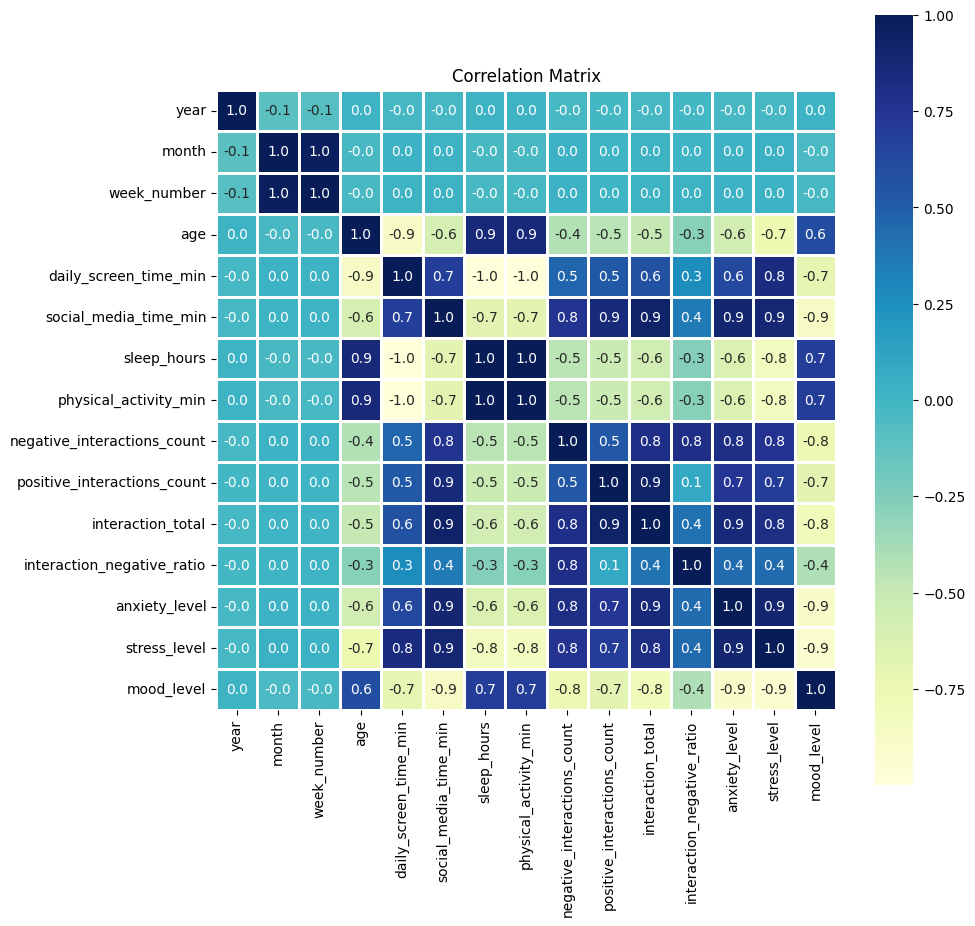

In [16]:
# set figure size
plt.figure(figsize=(10, 10))

# Create a heatmap to visually show the correlation
sns.heatmap(
    corr,
    cmap="YlGnBu",
    square=True,
    linewidths=1,
    linecolor="white",
    annot=True,          # show numbers
    fmt=".1f"            # round to 1 decimal place
)
plt.title("Correlation Matrix")

# Save figure and show
plt.savefig('../charts/correlation_matrix_heatmap.png')
plt.show()

### Correlation Summary

Date variables show almost no correlation with mental state

This suggests the dataset does not capture seasonal mood effects.
The distribution of moods and stress seems stable throughout the observed period.
<br /><br /><br />

Age is a major behavioral separator

Older individuals:
- sleep more (+0.86)
- are more physically active (+0.87)
- use screens less (–0.87)
- use social media less (–0.59)
Very strong age effects shape almost every lifestyle variable.
<br /><br /><br />

Sleep, screen time, and physical activity form an almost perfect inverse triangle

Correlations near +1/-1 reveal deterministic relationships:
- More screen time - much less sleep - much less physical activity
- These variables appear to be generated together
They are not independent and represent the same behavioral dimension.
<br /><br /><br />

Anxiety, stress, and mood are nearly perfectly correlated

This indicates:
- a shared emotional health factor
- mood is the inverse of anxiety/stress


---

## Emotional health vs behaviour pair plot

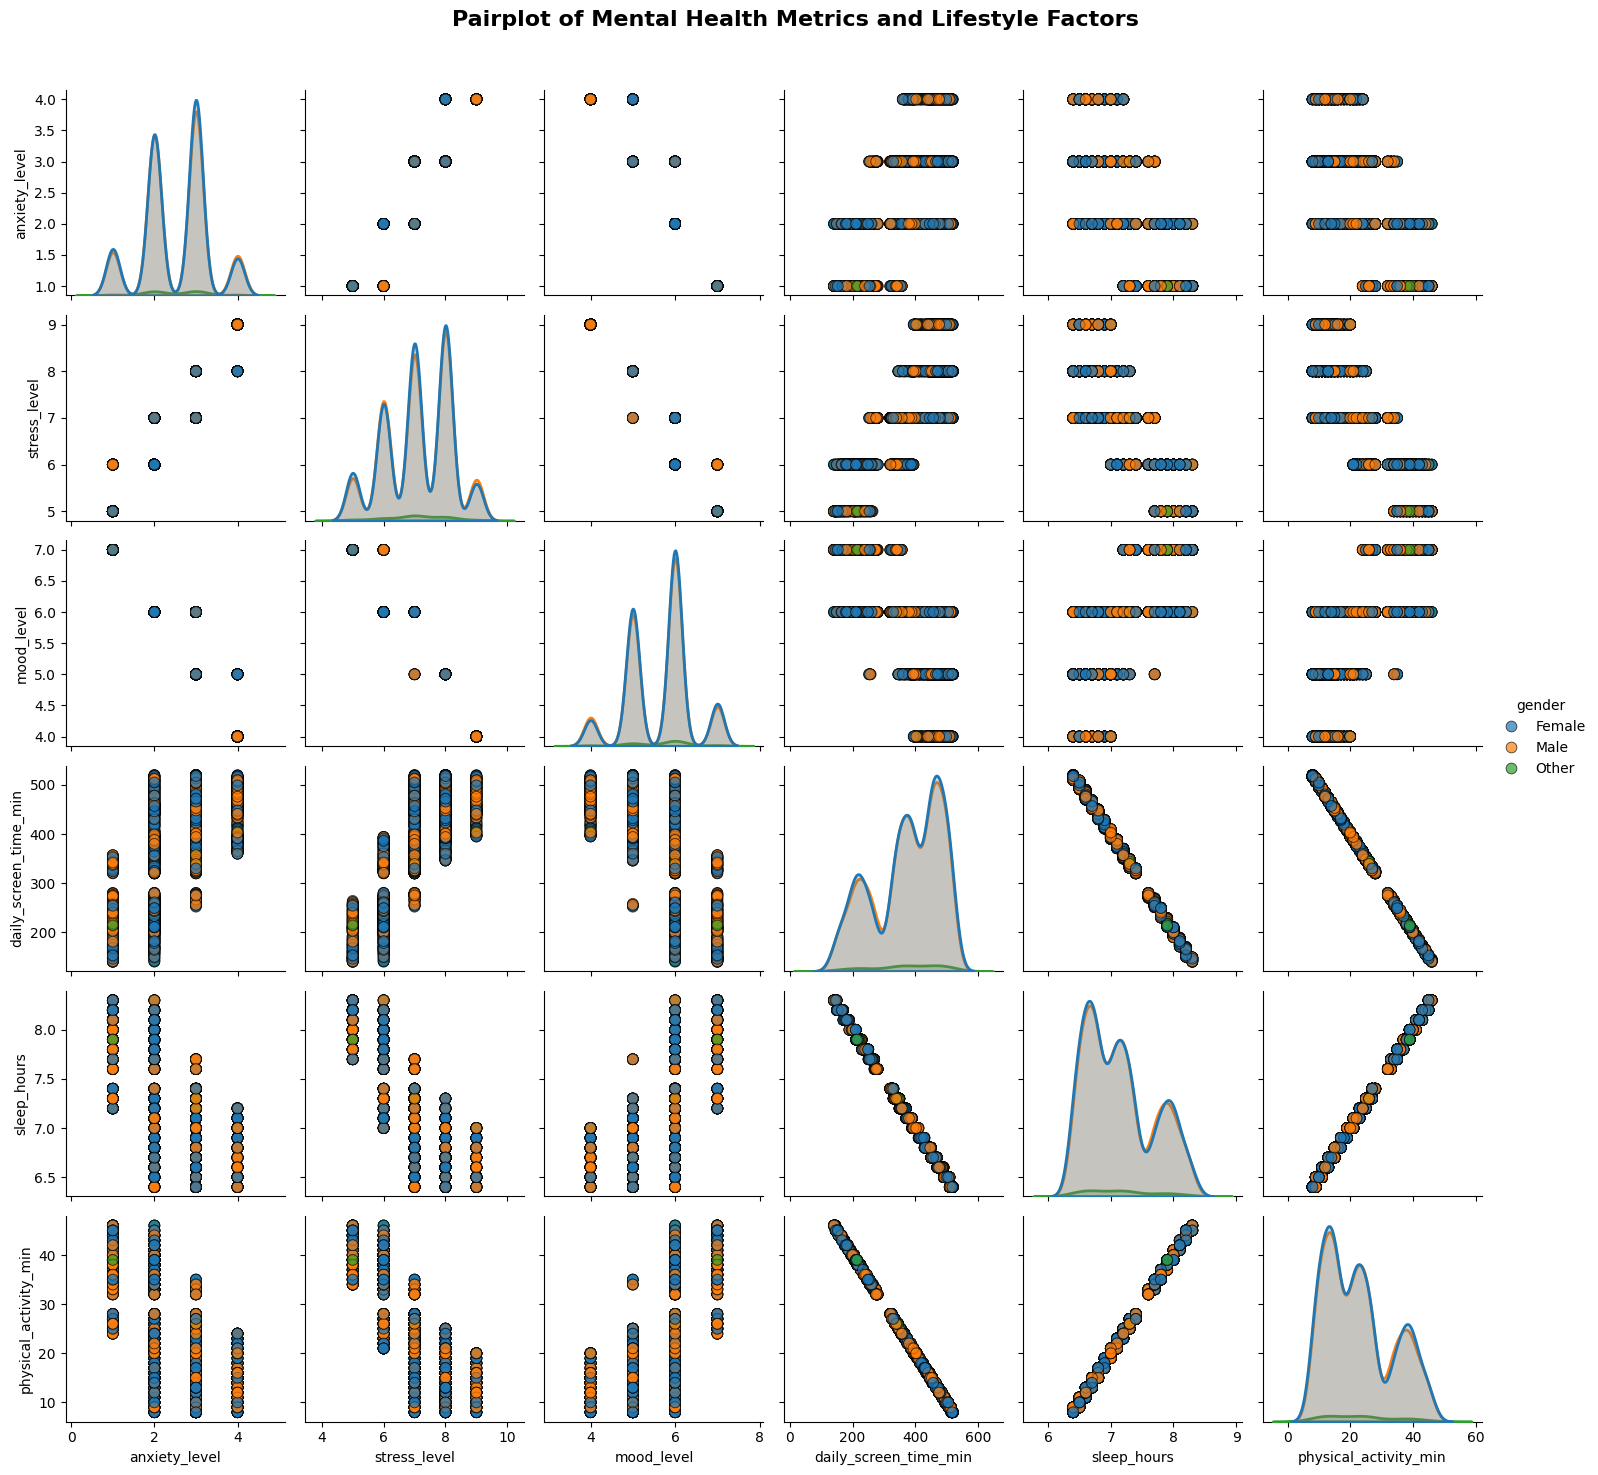

In [ ]:
# Pairplot to visualise relationships between mental health metrics and lifestyle factors
sns.pairplot(df, vars=[
                "anxiety_level", "stress_level", "mood_level",
                "daily_screen_time_min", "sleep_hours", "physical_activity_min"
            ], 
            hue="gender",
            plot_kws={"alpha": 0.7, "s": 60, "edgecolor": "k"},
            diag_kws={"fill": True, "linewidth": 2})

# Add overall title
plt.suptitle('Pairplot of Mental Health Metrics and Lifestyle Factors', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle and legend
plt.tight_layout(rect=[0, 0, 0.94, 0.96])

# Save figure and show
plt.savefig('../charts/pairplot_mental_health_metrics.png')
plt.show()

### Emotional health vs behaviour Summary

The pairplots reveal near-perfect linear and overlapping patterns across gender and behavioural variables, indicating that the dataset is synthetic and the relationships were likely generated using formulas rather than real-world observations.